<a href="https://colab.research.google.com/github/tanuushree/cuisine-classification/blob/main/cusine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Dataset.csv")

df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [9]:
df.shape

(9551, 21)

In [10]:
#checking for null values

missing_values = df.isnull().sum()
print(missing_values)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [11]:
df['Cuisines'].fillna('Unknown', inplace=True)

missing_values = df.isnull().sum()
print(missing_values)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [12]:
#checking data types of features to classify them as numerical and categorical

df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [13]:
column_names = df.columns.tolist()
print(column_names)

['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


In [14]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print(numerical_columns)

['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


In [15]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']


In [16]:
def remove_outlier(col):
    sorted(col)
    q1,q3 = col.quantile([0.25,0.75])
    iqr = q3-q1
    lwr_bound = q1 - (1.5*iqr)
    upr_bound = q3 + (1.5*iqr)
    return lwr_bound, upr_bound

Low of Restaurant ID is : -26773531.0
High of Restaurant ID is : 45427785.0


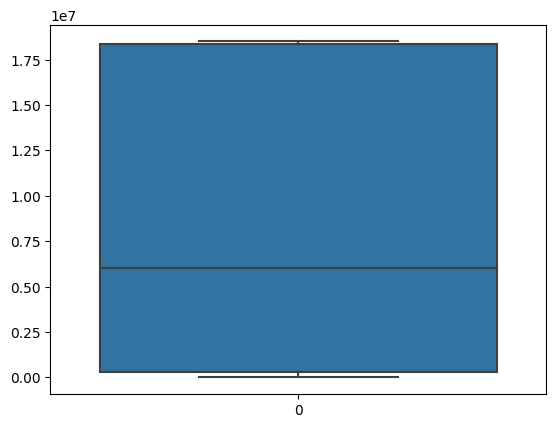

Low of Country Code is : 1.0
High of Country Code is : 1.0


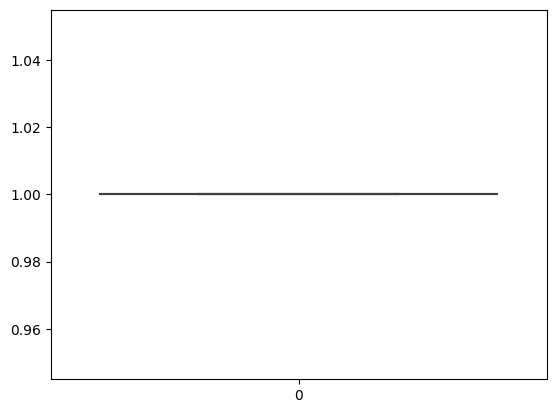

Low of Longitude is : 76.780348175
High of Longitude is : 77.58300117500002


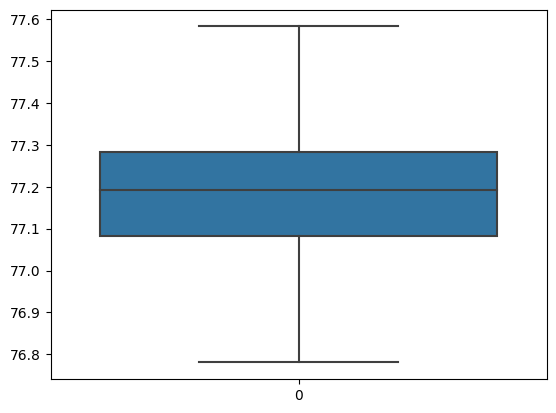

Low of Latitude is : 28.232644200000003
High of Latitude is : 28.888826599999994


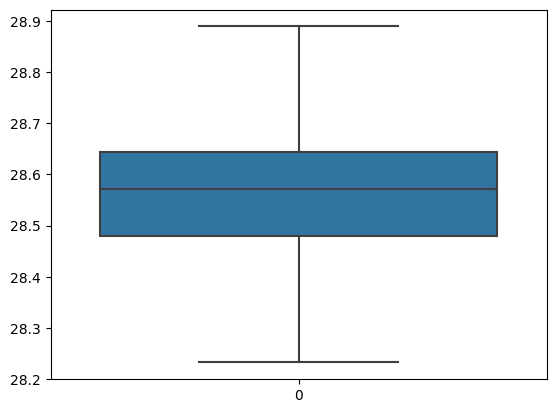

Low of Average Cost for two is : -425.0
High of Average Cost for two is : 1375.0


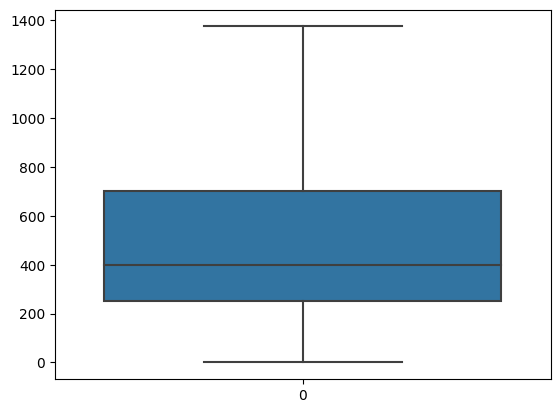

Low of Price range is : -0.5
High of Price range is : 3.5


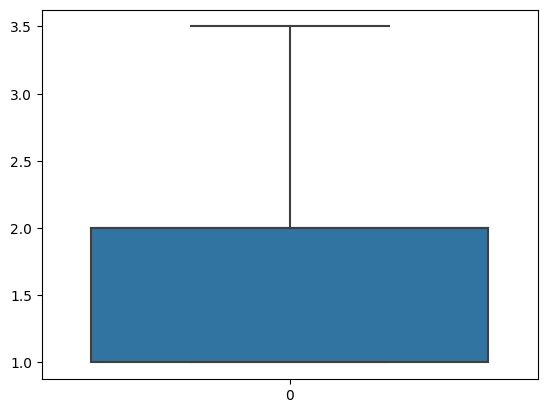

Low of Aggregate rating is : 0.6999999999999997
High of Aggregate rating is : 5.5


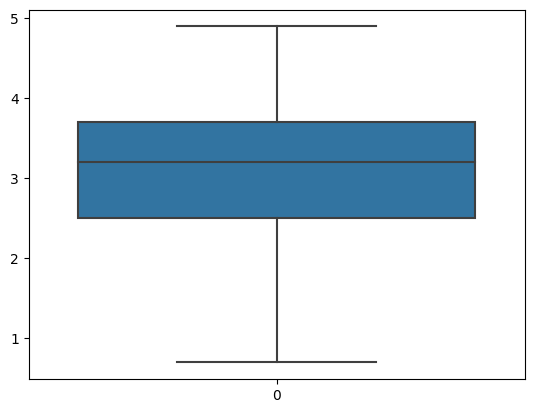

Low of Votes is : -184.0
High of Votes is : 320.0


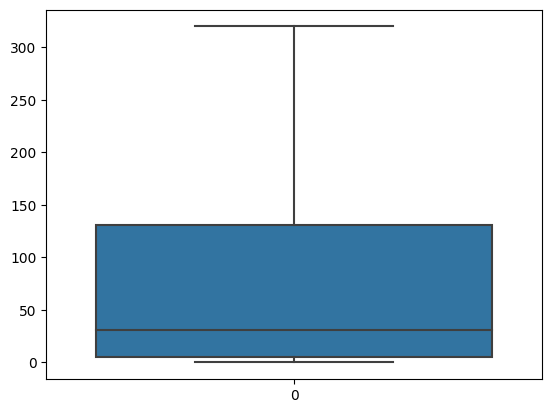

In [17]:
for i in numerical_columns :
    low, high = remove_outlier(df[i])
    print("Low of", i, "is :", low)
    print("High of", i, "is :", high)
    df[i] = np.where(df[i] > high, high, df[i])
    df[i] = np.where(df[i] < low, low, df[i])
    sns.boxplot(df[i])
    plt.show()

In [18]:
df = pd.concat([df, pd.get_dummies(df['Has Online delivery'], prefix='Has Online delivery', drop_first=True)], axis=1)
df.drop('Has Online delivery', axis=1, inplace=True)


In [19]:
df = pd.concat([df, pd.get_dummies(df['Has Table booking'], prefix='Has Table booking', drop_first=True)], axis=1)
df.drop('Has Table booking', axis=1, inplace=True)


In [20]:
df['Cuisines'] = df['Cuisines'].str.replace(',' , '')
df['Cuisines'] = df['Cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
df['Cuisines'].value_counts().head()

Indian North            936
Chinese Indian North    616
Indian Mughlai North    394
Chinese                 354
Fast Food               354
Name: Cuisines, dtype: int64

In [21]:
from sklearn.preprocessing import MultiLabelBinarizer

# Encoding categorical variables
mlb = MultiLabelBinarizer()
cuisines_encoded = mlb.fit_transform(df['Cuisines'])
df_encoded = pd.concat([df, pd.DataFrame(cuisines_encoded, columns=mlb.classes_)], axis=1)

In [22]:
X = df_encoded.drop(['Cuisines', 'Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Currency', 'Rating color', 'Rating text'], axis=1)

In [23]:
y = df_encoded[df_encoded.columns[11:]]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Has Online delivery_Yes,Has Table booking_Yes
0,6317637.0,Le Petit Souffle,1.0,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",77.583001,28.232644,Desserts French Japanese,...,Botswana Pula(P),No,No,3.0,4.8,Dark Green,Excellent,314.0,0,1
1,6304287.0,Izakaya Kikufuji,1.0,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",77.583001,28.232644,Japanese,...,Botswana Pula(P),No,No,3.0,4.5,Dark Green,Excellent,320.0,0,1
2,6300002.0,Heat - Edsa Shangri-La,1.0,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",77.583001,28.232644,Asian Filipino Indian Seafood,...,Botswana Pula(P),No,No,3.5,4.4,Green,Very Good,270.0,0,1
3,6318506.0,Ooma,1.0,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",77.583001,28.232644,Japanese Sushi,...,Botswana Pula(P),No,No,3.5,4.9,Dark Green,Excellent,320.0,0,0
4,6314302.0,Sambo Kojin,1.0,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",77.583001,28.232644,Japanese Korean,...,Botswana Pula(P),No,No,3.5,4.8,Dark Green,Excellent,229.0,0,1
